In [1]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.1674, 0.9550, 0.9768],
        [0.8886, 0.4494, 0.8122],
        [0.2376, 0.4831, 0.4760],
        [0.4791, 0.4431, 0.0933],
        [0.0960, 0.2594, 0.5854]])


In [3]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [8]:
import numpy as np
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(x_np)

tensor([[1, 2],
        [3, 4]])


In [22]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

x_ones_float = torch.ones_like(x_data, dtype=torch.float)
print(f"ones float Tensor : \n {x_ones_float} \n")


x_bools = torch.rand_like(x_data, dtype=torch.bool)
print(f"bools Tensor : \n {x_bools} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.0316, 0.1235],
        [0.9903, 0.6996]]) 

ones float Tensor : 
 tensor([[1., 1.],
        [1., 1.]]) 



RuntimeError: "check_uniform_bounds" not implemented for 'Bool'

In [21]:
dir(torch.dtype)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'is_complex',
 'is_floating_point',
 'is_signed']

(145460, 23)
        Rainfall  Humidity9am  Pressure9am  RainToday  RainTomorrow
0            0.6         71.0       1007.7        0.0           0.0
1            0.0         44.0       1010.6        0.0           0.0
2            0.0         38.0       1007.6        0.0           0.0
3            0.0         45.0       1017.6        0.0           0.0
4            1.0         82.0       1010.8        0.0           0.0
...          ...          ...          ...        ...           ...
145455       0.0         51.0       1024.6        0.0           0.0
145456       0.0         56.0       1023.5        0.0           0.0
145457       0.0         53.0       1021.0        0.0           0.0
145458       0.0         51.0       1019.4        0.0           0.0
145459       0.0         62.0       1020.2        0.0           NaN

[145460 rows x 5 columns]
X_train : 
tensor([[1.4200e+01, 9.4000e+01, 1.0241e+03, 1.0000e+00],
        [0.0000e+00, 5.2000e+01, 1.0118e+03, 0.0000e+00],
        [2.0000e-

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


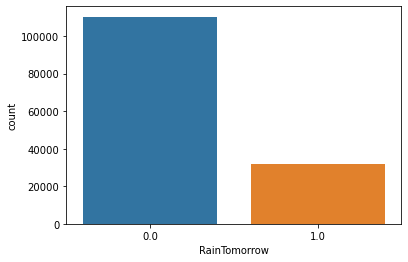

In [135]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch
import numpy as np
import torch.nn.functional as F

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

df = pd.read_csv('weatherAUS.csv')
print(df.shape)
cols = ['Rainfall','Humidity9am','Pressure9am','RainToday','RainTomorrow']
df = df[cols]

df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

df.dropna(how='any')
print(df)

sns.countplot(df.RainTomorrow)

X_train,X_test, y_train, y_test = train_test_split(df[['Rainfall','Humidity9am','Pressure9am','RainToday']],df['RainTomorrow'], test_size=0.2,random_state=RANDOM_SEED)

X_train = torch.from_numpy(X_train.to_numpy()).float()
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())

print(f"X_train : \n{X_train}\ny_train : \n{y_train}")

X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())




In [136]:
from torch import nn, optim
class Net(nn.Module):
    def __init__(self, n_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, 5)
        self.fc2 = nn.Linear(5, 3)
        self.fc3 = nn.Linear(3, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return torch.sigmoid(self.fc3(x))
    
    

In [137]:
net = Net(X_train.shape[1])
criterion = nn.BCELoss()

optimizer = optim.Adam(net.parameters(), lr=0.001)

def round_tensor(t, decimal_places=3):
    return round(t.item(), decimal_places)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('device : ',device)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
net = net.to(device)
criterion = criterion.to(device)

device :  cpu


In [139]:

for epoch in range(1000):
    y_pred = net(X_train)
    y_pred = torch.squeeze(y_pred)
    print(f"y_pred : \n{y_pred}\nmin,max : {min(y_pred),max(y_pred)}\ny_train :\n{y_train}\n min,max : {min(y_train),max(y_train)}")
    train_loss = criterion(y_pred, y_train)
    if epoch % 100 == 0:
      train_acc = calculate_accuracy(y_train, y_pred)
      y_test_pred = net(X_test)
      y_test_pred = torch.squeeze(y_test_pred)
      test_loss = criterion(y_test_pred, y_test)
      test_acc = calculate_accuracy(y_test, y_test_pred)
      print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

y_pred : 
tensor([1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
       grad_fn=<SqueezeBackward0>)
min,max : (tensor(1.0000, grad_fn=<UnbindBackward>), tensor(1., grad_fn=<UnbindBackward>))
y_train :
tensor([1., 0., 0.,  ..., 0., 0., 0.])
 min,max : (tensor(0.), tensor(1.))


RuntimeError: all elements of input should be between 0 and 1

In [150]:
help(torch.sigmoid)

Help on built-in function sigmoid:

sigmoid(...)
    sigmoid(input, *, out=None) -> Tensor
    
    Returns a new tensor with the sigmoid of the elements of :attr:`input`.
    
    .. math::
        \text{out}_{i} = \frac{1}{1 + e^{-\text{input}_{i}}}
    
    Args:
        input (Tensor): the input tensor.
    
    Keyword args:
        out (Tensor, optional): the output tensor.
    
    Example::
    
        >>> a = torch.randn(4)
        >>> a
        tensor([ 0.9213,  1.0887, -0.8858, -1.7683])
        >>> torch.sigmoid(a)
        tensor([ 0.7153,  0.7481,  0.2920,  0.1458])



In [158]:
import numpy as np
import pandas as pd
import os
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from torch.utils.data import DataLoader, Dataset
from collections import Counter
from sklearn.metrics import accuracy_score

input_size = 12
hidden_size = 128
num_classes = 1 
num_epochs = 5
learning_rate = 0.001
BATCH_SIZE_1 = 101 #train_loader as it has 404 observations
BATCH_SIZE_2 = 51 #test_loader as it has 102 observations

# setting the path for Data from data/housing folder
DATA_FILE_TRAIN = 'Boston.csv'
#setting the random seed 
np.random.seed(42)
# Loading the dataset
train_data = pd.read_csv(DATA_FILE_TRAIN)
print(train_data.shape)
print(train_data.head())

id_col = ['ID']
categorical_features = ['chas'] 
target_feature = 'medv'

dropped_cols = id_col+categorical_features
train_data = train_data.drop(dropped_cols, axis=1)
all_features = train_data.columns.tolist()  #this will not have 'chas' and 'ID'

numerical_features = list(set(all_features)- set([target_feature]))


train_data_inp = train_data[numerical_features]
train_data_tar = train_data[target_feature]
Trn_input,  Val_inp, Trn_target,Val_target = train_test_split(train_data_inp, train_data_tar, test_size=0.2,random_state=123)
# Train_data has our training dataset and Valid_data has our validation dataset.
Train_data = pd.concat([Trn_input, pd.DataFrame(Trn_target)], axis=1)
Valid_data = pd.concat([Val_inp, pd.DataFrame(Val_target)], axis=1)
print(Train_data.shape)
print(Valid_data.shape)


class oversampdata(Dataset):

    def __init__(self, data):
        self.data = torch.FloatTensor(data.values.astype('float'))
        print(self.data.shape)
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        target = self.data[index][-1]
        data_val = self.data[index] [:-1]
        return data_val,target
    

train_dataset = oversampdata(Train_data)
valid_dataset = oversampdata(Valid_data)

device = "cuda" if torch.cuda.is_available() else "cpu"
kwargs = {'num_workers': 1, 'pin_memory': True} if device=='cuda' else {}

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE_1, shuffle=True, **kwargs)
test_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE_2, shuffle=True, **kwargs)

# Simple Neural network 

input_size = 12
hidden_size = 128
num_classes = 1
num_epochs = 5
learning_rate = 0.001

# Neural Network should have a sigmoid activation function if you are using BCELoss()
class LinearModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LinearModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()
                           
    def get_weights(self):
        return self.weight
    
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu(out)
        out = F.sigmoid(self.fc2(out)) #sigmoid as we use BCELoss
        return out
    
#TRAINING THE NETWORK
def train(model, device, train_loader, optimizer):
    model.train()
    y_true = []
    y_pred = []
    for i in train_loader:
        
        #LOADING THE DATA IN A BATCH
        data, target = i
 
        #MOVING THE TENSORS TO THE CONFIGURED DEVICE
        data, target = data.to(device), target.to(device)
       
        #FORWARD PASS
        output = model(data.float())
        loss = criterion(output, target.unsqueeze(1)) 
        
        #BACKWARD AND OPTIMIZE
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # PREDICTIONS 
        pred = np.round(output.detach())
        target = np.round(target.detach())            
        y_pred.extend(pred.tolist())
        y_true.extend(target.tolist())
        
    print("Accuracy on training set is" ,accuracy_score(y_true,y_pred))

                          
#TESTING THE MODEL
def test(model, device, test_loader):
    #model in eval mode skips Dropout etc
    model.eval()
    y_true = []
    y_pred = []
    
    # set the requires_grad flag to false as we are in the test mode
    with torch.no_grad():
        for i in test_loader:
            
            #LOAD THE DATA IN A BATCH
            data,target = i
            
            # moving the tensors to the configured device
            data, target = data.to(device), target.to(device)
            
            # the model on the data
            output = model(data.float())
                       
            #PREDICTIONS
            pred = np.round(output)
            target = target.float()
            y_true.extend(target.tolist()) 
            y_pred.extend(pred.reshape(-1).tolist())
    
            
    print("Accuracy on test set is" , accuracy_score(y_true,y_pred))
    print("***********************************************************")
                          


# Creating model and setting loss and optimizer.
model = LinearModel(input_size, hidden_size, num_classes).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

                          
for epoch in range(num_epochs):
        train(model,device,BATCH_SIZE_1,optimizer)
        test(model,device,test_loader)

(506, 15)
   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
(404, 13)
(102, 13)


NameError: name 'Dataset' is not defined

In [161]:
import pandas as pd
help(pd.DataFrame.dropna)

Help on function dropna in module pandas.core.frame:

dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)
    Remove missing values.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        .. versionchanged:: 1.0.0
    
           Pass tuple or list to drop on multiple axes.
           Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame, when we have
        at least one NA or all NA.
    
        * 'any' : If any NA values are present, drop that row or column.
        * 'all' :